# Evaluating Performance of the Reheat Cycle 8.3,8.4

Chapter 8 : Vapour Power Systems:Reheat Cycle

* Example 8.3: Evaluating Performance of an Ideal Reheat Cycle(449-451)

* Example 8.4: Evaluating Performance of a Reheat Cycle with Turbine Irreversibility Page451


## 1 Example 8.3:  Evaluating Performance of an Ideal Reheat Cycle(449-451)

Steam is the working fluid in an ideal Rankine cycle with `superheat` and `reheat`. 

Steam enters the first-stage turbine at 8.0 MPa, 4808C, and expands to 0.7 MPa. It is then reheated to 4408C before entering the second-stage turbine, where it expands to the condenser pressure of 0.008 MPa. The net power output is 100 MW. 

#### Determine

* (a) the thermal efficiency of the cycle, 

* (b) the mass flow rate of steam, in $kg/h$, 

* (c) the rate of heat transfer $Q_{out}$  from the condensing steam as it passes through the condenser, in $MW$. Discuss the effects of reheat on the vapor power cycle.

#### SOLUTION

**Known**: An ideal reheat cycle operates with steam as the working fluid. Operating pressures and temperatures are specified, and the net power output is given.

**Find:** Determine the thermal efficiency, the mass flow rate of the steam, in $kg/h$

Engineering Model:
1. Each component in the cycle is analyzed as a control volume at steady state. The control volumes are shown on the accompanying sketch by dashed lines.

2. All processes of the working fluid are internally reversible.

3. The turbine and pump operate adiabatically.

4. Condensate exits the condenser as saturated liquid.

5. Kinetic and potential energy effects are negligible.

![Rankine83](./img/rankine83.png) 



### Analysis:

To begin, we fix each of the principal states.

In [2]:
from seuif97 import *

# Fix the states

# State1 
t1=480
p1=8
h1 =pt2h(p1,t1)
s1=pt2s(p1,t1)

# State 2
p2=0.7
s2=s1
h2 =ps2h(p2,s2)
t2=ps2t(p2,s2)

# State 3
t3=440
p3=p2
h3 =pt2h(p3,t3)
s3 =pt2s(p3,t3)


# State 4
p4=0.008
s4=s3
h4 =ps2h(p4,s4)
t4=ps2t(p4,s4)

# State 5
p5=0.008
t5=px2t(p5,0)
h5=px2h(p5,0)
s5=px2s(p5,0)

# State 6
p6=8.0
s6=s5
h6 =ps2h(p6,s6)
t6=ps2t(p6,s6)

### Part (a)

The net power developed by the cycle is 

$\dot{W}_{cycle}=\dot{W}_{t1}+\dot{W}_{t2}-\dot{W}_{p}$

Mass and energy rate balances for the two turbine stages and the pump reduce to give, respectively

Turbine 1: ${\dot{W}_{t1}}/{\dot{m}}=h_1-h_2$

Turbine 2: ${\dot{W}_{t2}}/{\dot{m}}=h_3-h_4$

Pump:  ${\dot{W}_{p}}/{\dot{m}}=h_6-h_5$

where $\dot{m}$ is the mass flow rate of the steam.

The total rate of heat transfer to the working fluid as it passes through the boiler–superheater and reheater is

$\frac{\dot{Q}_{in}}{\dot{m}}=(h_1-h_6)+(h_3-h_2)$

Using these expressions, the thermal efficiency is

$\eta=\frac{(h_1-h_2)+(h_3-h_4)--(h_6-h_5)}{(h_1-h_6)+(h_3-h_2}$

In [5]:
eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 

# Result
print('The thermal efficiency is %.2f'%(100*eta),'%')


The thermal efficiency is 40.33 %


**(b)** The mass flow rate of the steam can be obtained with the expression for net power given in part (a).

$\dot{m}=\frac{\dot{W}_{cycle}}{(h_1-h_2)+(h_3-h_4)-(h_6-h_5)}$


In [7]:
# Part(b)
Wcycledot = 100.0
mdot = (Wcycledot*3600*10**3)/((h1-h2)+(h3-h4)-(h6-h5))
print('The mass flow rate of steam, is %.2f' %mdot,'kg/h.')

The mass flow rate of steam, is 236240.84 kg/h.


**(c)** The rate of heat transfer from the condensing steam to the cooling water is

$\dot{Q}_{out}=\dot{m}(h_4-h_5)$

In [9]:
# Part(c)
Qoutdot = (mdot*(h4-h5))/(3600*10**3)
print('The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is %.2f'%Qoutdot,'kg/h.')

The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is 147.97 kg/h.


To see the effects of reheat, we compare the present values with their counterparts in Example 8.1. With superheat and reheat, the thermal efficiency is
increased over that of the cycle of Example 8.1. For a specified net power output(100 MW), a larger thermal efficiency means that a smaller mass flow rate
of steam is required. Moreover, with a greater thermal efficiency the rate of heat transfer to the cooling water is also less, resulting in a reduced demand
for cooling water. With reheating, the steam quality at the turbine exhaust is substantially increased over the value for the cycle of Example 8.1

## 2 Example 8.4: Evaluating Performance of a Reheat Cycle with Turbine Irreversibility Page451

Reconsider the reheat cycle of Example 8.3, but include in the analysis that each turbine stage has the same isentropic efficiency. 

(a) If $\eta_t=85$%, determine the thermal efficiency. 

(b) Plot the thermal efficiency versus turbine stage isentropic efficiency ranging from 85 to 100%.

![rankine84](./img/rankine84a.png)

### SOLUTION

* **Known:** A reheat cycle operates with steam as the working fluid. Operating pressures and temperatures are specified. Each turbine stage has the same isentropic efficiency.

* **Find:**
  
  * If $\eta_t=85$%, determine the thermal efficiency.

  * plot the thermal efficiency versus turbine stage isentropic efficiency ranging from 85 to 100%.
  
### Engineering Model:

1. As in Example 8.3, each component is analyzed as a control volume at steady state.

2. Except for the two turbine stages, all processes are internally reversible.

3. The turbine and pump operate adiabatically.

4. The condensate exits the condenser as saturated liquid.

5. Kinetic and potential energy effects are negligible.  


In [18]:
from seuif97 import *

# Fix the states
def FixStates(etat):

    # State1 
    t1=480
    p1=8
    h1 =pt2h(p1,t1)
    s1=pt2s(p1,t1)

    # State 2
    p2=0.7
    s2s=s1
    h2s =ps2h(p2,s2s)
    etat1=etat
    h2=h1-etat1*(h1-h2s)
    s2=ph2s(p2,h2)
    t2=ph2t(p2,h2)

    # State 3
    t3=440
    p3=p2
    h3 =pt2h(p3,t3)
    s3 =pt2s(p3,t3)


    # State 4
    p4=0.008
    s4s=s3
    h4s =ps2h(p4,s4s)
    etat2=etat1
    h4=h3-etat2*(h3-h4s)
    s4 =ph2s(p4,h4)
    s4 =ph2t(p4,h4)

    # State 5
    p5=0.008
    t5=px2t(p5,0)
    h5=px2h(p5,0)
    s5=px2s(p5,0)

    # State 6
    p6=8.0
    s6=s5
    h6 =ps2h(p6,s6)
    t6=ps2t(p6,s6)
    return h1,h2,h3,h4,h5,h6

The thermal efficiency is then

In [19]:
etat=0.85
h1,h2,h3,h4,h5,h6= FixStates(etat)
eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 

# Result
print('The thermal efficiency is:%.2f  '%(100*eta),'%')

The thermal efficiency is:35.09   %


###  Turbine isentropic efficiency  &  cycle thermal efficiency

#### Sweep eta from `0.85` to `1.0` in steps of `0.01`,then, using the  matplotlib.pyplot

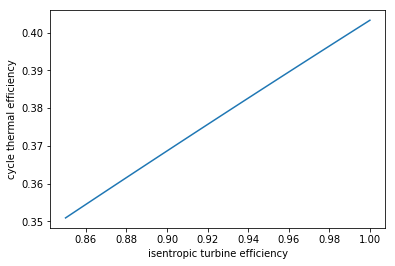

In [24]:
%matplotlib inline
# Part (b)
from numpy import linspace
import matplotlib.pyplot as plt

etas  = []
etats = linspace(0.85,1,50)
for i in range(0,50):
    h1,h2,h3,h4,h5,h6= FixStates(etats[i])
    eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 
    etas.append(eta)
    
plt.plot(etats,etas)
plt.xlabel('isentropic turbine efficiency')
plt.ylabel('cycle thermal efficiency')
plt.show()

From the Fig, we see that the cycle thermal efficiency increases from `0.351` to` 0.403` as turbine stage isentropic efficiency increases from `0.85` to `1.00`

`Turbine isentropic efficiency` is seen to have a significant effect on `cycle thermal efficiency.`